# Demographics Correlation
- age, gender, socioeconomic status correlate with crime rates

Demographic Correlation: Assess how demographic factors (e.g., age, gender, socioeconomic status) correlate with crime rates to understand vulnerabilities within the community.

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
file_path = "/Users/admin/Desktop/Crime data POC/Community-Risk-Profiling-Using-FIR-Data/dataset/State-wise data from 2001 is classified according to 40+factors/20_Victims_of_rape.csv"
df = pd.read_csv(file_path)
df.head()


,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [263]:
print("Number of columns:", len(df.columns))
df.columns

Number of columns: 11


Index(['Area_Name', 'Year', 'Subgroup', 'Rape_Cases_Reported',
       'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
       'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
       'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total',
       'Victims_Upto_10_Yrs'],
      dtype='object')

In [264]:
# Show shape
print(f"Dataset Shape: {df.shape}")

# Check for nulls
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (1050, 11)

Missing Values:
Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64


In [265]:
# Data types
print("\nData Types:")
print(df.dtypes)

# Unique values in Area_Name, Year, Subgroup
print("\nUnique Values:")
print(f"Area_Name: {df['Area_Name'].nunique()} areas")
print(f"Years: {sorted(df['Year'].unique())}")
print(f"Subgroups: {df['Subgroup'].unique()}")


Data Types:
Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

Unique Values:
Area_Name: 35 areas
Years: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010)]
Subgroups: ['Total Rape Victims' 'Victims of Incest Rape' 'Victims of Other Rape']


In [266]:
df.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Uttar Pradesh
up_df_rape = df[df["Area_Name"] == "Uttar Pradesh"]

# Group by year and sum reported cases
up_yearly = up_df_rape.groupby("Year")["Rape_Cases_Reported"].sum().reset_index()

# Aggregate by age group for Uttar Pradesh
age_columns = [
    'Victims_Upto_10_Yrs',
    'Victims_Between_10-14_Yrs',
    'Victims_Between_14-18_Yrs',
    'Victims_Between_18-30_Yrs',
    'Victims_Between_30-50_Yrs',
    'Victims_Above_50_Yrs'
]

age_distribution = up_df_rape[age_columns].sum()


In [293]:
# ✅ Set base path
data_path_2 = "/Users/admin/Desktop/Crime data POC/Community-Risk-Profiling-Using-FIR-Data/dataset/data.gov/"

df_SC = pd.read_excel(os.path.join(data_path_2, "datafile.xlsx"))
df_SC.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,MURDER OF SCs,45,60,33,39,37,52,46,48,35,43,64,54
1,ARUNACHAL PRADESH,MURDER OF SCs,0,0,0,0,1,0,0,0,0,0,0,0
2,ASSAM,MURDER OF SCs,0,3,8,0,21,5,11,9,0,0,0,0
3,BIHAR,MURDER OF SCs,28,33,9,14,12,16,26,46,22,24,29,27
4,CHHATTISGARH,MURDER OF SCs,8,11,12,25,6,10,11,7,11,8,2,6


In [294]:
# Rename a column
df_SC.rename(columns={'CRIME HEAD': 'Crime_Head'}, inplace=True)

df_SC.Crime_Head.unique()

array(['MURDER OF SCs', 'RAPE OF SCs', 'KIDNAPPING AND ABDUCTION OF SCs',
       'DACOITY OF SCs', 'ROBBERY OF SCs', 'ARSON OF SCs', ' HURT OF SCs',
       'OTHER CRIMES AGAINST SCs',
       'PROTECTION OF CIVIL RIGHTS ACT FOR SCs',
       'SC/ST (PREVENTION OF ATROCITIES) ACT OF SCs',
       'TOTAL CRIMES AGAINST SCs'], dtype=object)

In [295]:
df_SC['STATE/UT'].unique()


array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [296]:
df_SC.columns = df_SC.columns.astype(str).str.strip().str.replace(" ", "_")
print(df_SC.columns.tolist())


['STATE/UT', 'Crime_Head', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


In [297]:
yearly_total = df_SC.loc[:, '2001':'2012'].sum()
yearly_total

2001    201006
2002    201042
2003    157512
2004    161322
2005    156762
2006    162420
2007    180186
2008    200580
2009    200472
2010    195858
2011    202314
2012    201930
dtype: int64

In [267]:
# ✅ Set base path
data_path_3 = "/Users/admin/Desktop/Crime data POC/Community-Risk-Profiling-Using-FIR-Data/dataset/age_gender/crime_dataset_india.csv"
df_age_gender = pd.read_csv(data_path_3)
df_age_gender = df_age_gender[df_age_gender['Victim Gender'] != 'X']

df_age_gender.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [299]:
df_age_gender.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed', 'Age_Group'],
      dtype='object')

In [300]:
# Check missing values
print(df_age_gender.isnull().sum())

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5182
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      17936
Age_Group                 0
dtype: int64


# Visualization

### Crime Count by Victim Age Group

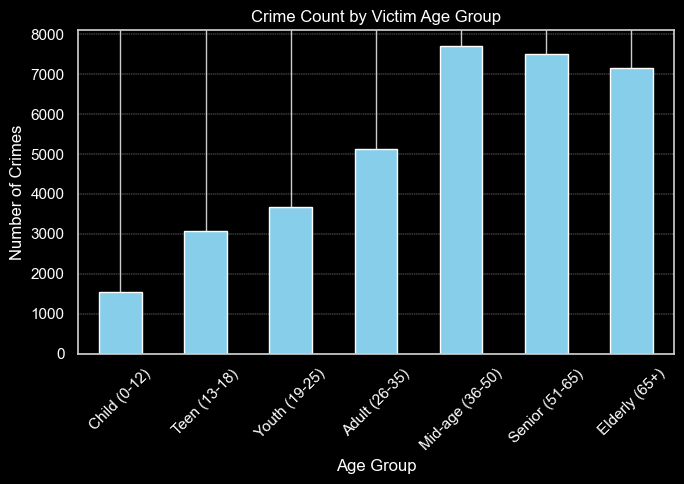

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Age buckets
bins = [0, 12, 18, 25, 35, 50, 65, 100]
labels = ['Child (0-12)', 'Teen (13-18)', 'Youth (19-25)', 'Adult (26-35)', 'Mid-age (36-50)', 'Senior (51-65)', 'Elderly (65+)']
df_age_gender['Age_Group'] = pd.cut(df_age_gender['Victim Age'], bins=bins, labels=labels)

# Plot
age_group_counts = df_age_gender['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(7, 5), facecolor='black')
ax = age_group_counts.plot(kind='bar', color='skyblue')

# Styling
ax.set_facecolor('black')
ax.tick_params(colors='white')
ax.set_title('Crime Count by Victim Age Group', color='white')
ax.set_xlabel('Age Group', color='white')
ax.set_ylabel('Number of Crimes', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Light gridlines
ax.grid(True, color='lightgray', linestyle='--', linewidth=0.3, axis='y')

plt.tight_layout()
plt.show()


##### Age-wise Distribution of Rape Victims in Uttar Pradesh

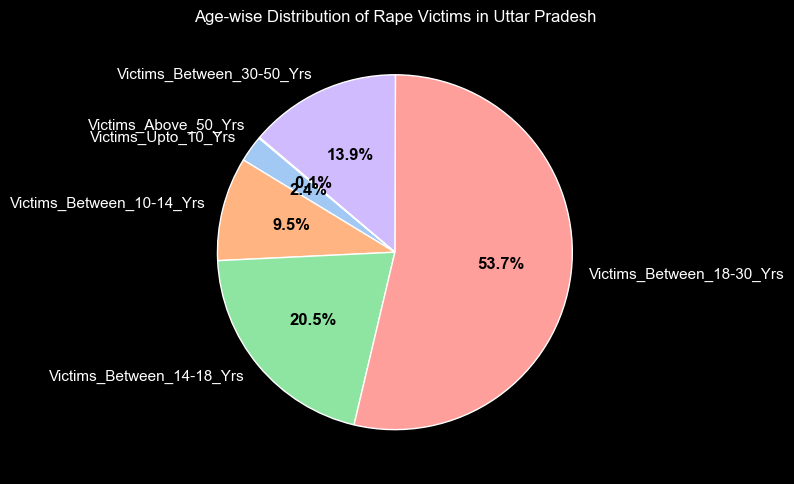

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
fig, ax = plt.subplots(figsize=(8,5), facecolor='black')
colors = sns.color_palette("pastel")

# Pie chart
wedges, texts, autotexts = ax.pie(
    age_distribution, 
    labels=age_columns, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=140,
    textprops={'color': 'white'}
)

# Make the percentage texts inside darker
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Set black background for the axes
ax.set_facecolor('black')
plt.title("Age-wise Distribution of Rape Victims in Uttar Pradesh", color='white')
plt.tight_layout()
plt.show()


### Crime Count by Victim gender Group

##### Crime Victim Gender Distribution in Uttar Pradesh Cities

In [358]:
# Sample list of cities in Uttar Pradesh
up_cities = ['Lucknow', 'Kanpur', 'Varanasi', 'Agra', 'Meerut', 'Ghaziabad', 'Noida', 
             'Prayagraj', 'Bareilly', 'Moradabad', 'Aligarh', 'Jhansi', 'Gorakhpur']

# Filter dataset
df_up = df_age_gender[df_age_gender['City'].isin(up_cities)].copy()
# Ensure time column is in datetime format and extract hour
df_up['Time of Occurrence'] = pd.to_datetime(df_up['Time of Occurrence'], errors='coerce')
df_up['Hour'] = df_up['Time of Occurrence'].dt.hour

# Clean gender
df_up = df_up[df_up['Victim Gender'].isin(['M', 'F'])]
# Count crimes by gender in UP
gender_counts = df_up['Victim Gender'].value_counts()
df_women_up = df_up[df_up['Victim Gender'] == 'F']
df_women_up.loc[:, 'Crime Description'] = df_women_up['Crime Description'].str.strip().str.capitalize()
top_crimes_women = df_women_up['Crime Description'].value_counts().head(10)

print(top_crimes_women)


Crime Description
Vandalism              152
Kidnapping             145
Public intoxication    143
Traffic violation      141
Extortion              139
Domestic violence      139
Assault                137
Arson                  131
Firearm offense        129
Vehicle - stolen       128
Name: count, dtype: int64


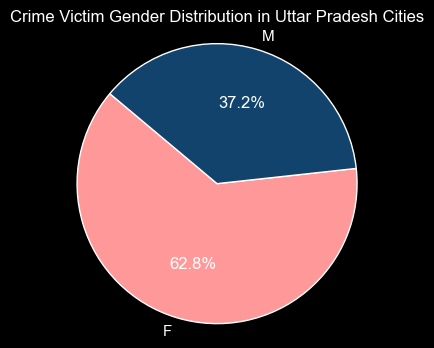

In [363]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(5, 4), facecolor='black')
colors = ['#ff9999', '#12436D']

# Create pie chart
wedges, texts, autotexts = ax.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'white'}
)

# Set background color
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Title
plt.title('Crime Victim Gender Distribution in Uttar Pradesh Cities', color='white')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


##### Top Crimes Against Women in Uttar Pradesh

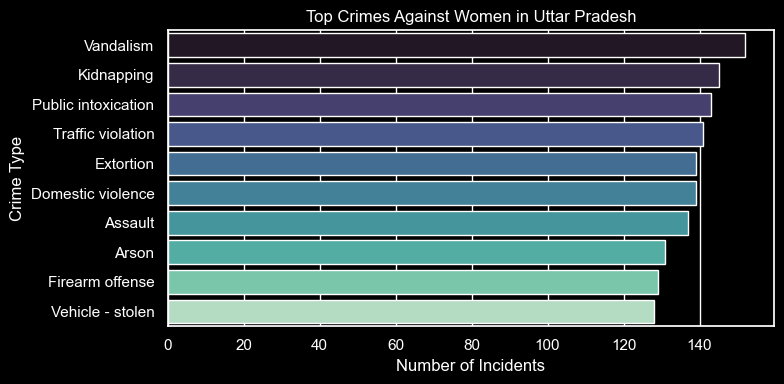

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_crimes_women.values,
    y=top_crimes_women.index,
    hue=top_crimes_women.index,  # Using index as hue
    palette="mako",
    legend=False
)
plt.title("Top Crimes Against Women in Uttar Pradesh")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()


##### Rape Cases Reported in Uttar Pradesh Over the Years

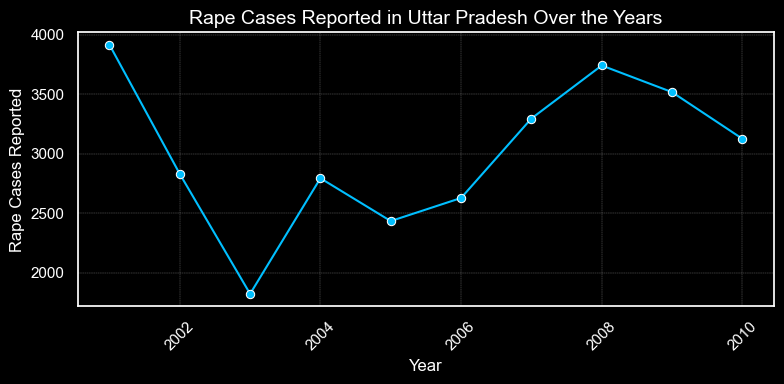

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark grid style
sns.set(style="darkgrid")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')       # Figure background
ax.set_facecolor('black')              # Axes background

# Plot the line
sns.lineplot(data=up_yearly, x="Year", y="Rape_Cases_Reported", marker="o", color='deepskyblue', ax=ax)

# Set title and labels with white text
ax.set_title("Rape Cases Reported in Uttar Pradesh Over the Years", fontsize=14, color='white')
ax.set_xlabel("Year", color='white')
ax.set_ylabel("Rape Cases Reported", color='white')

# Customize ticks and grid
ax.tick_params(colors='white')
ax.grid(color='gray', linestyle='--', linewidth=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Total Rape Cases Reported in India Over the Years

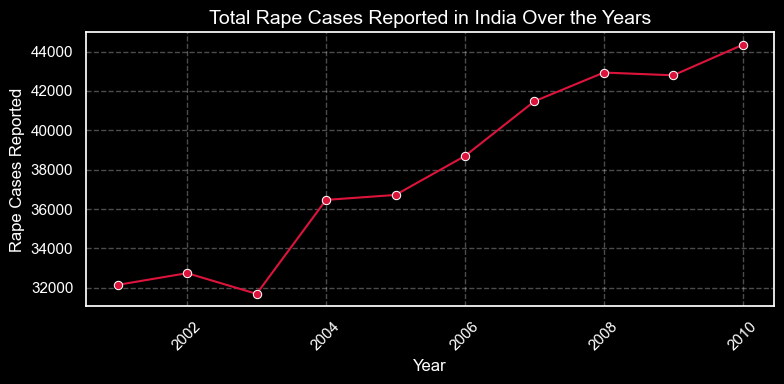

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4), facecolor='black')

# Total Rape Cases per Year
yearly_trend = df.groupby("Year")["Rape_Cases_Reported"].sum().reset_index()

# Create the plot
ax = sns.lineplot(
    data=yearly_trend, 
    x="Year", 
    y="Rape_Cases_Reported", 
    marker="o", 
    color='crimson'
)

# Customizing background and text colors
ax.set_facecolor("black")
plt.title("Total Rape Cases Reported in India Over the Years", fontsize=14, color='white')
plt.xlabel("Year", color='white')
plt.ylabel("Rape Cases Reported", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Crime against Schedule Caste during (2001–2012)

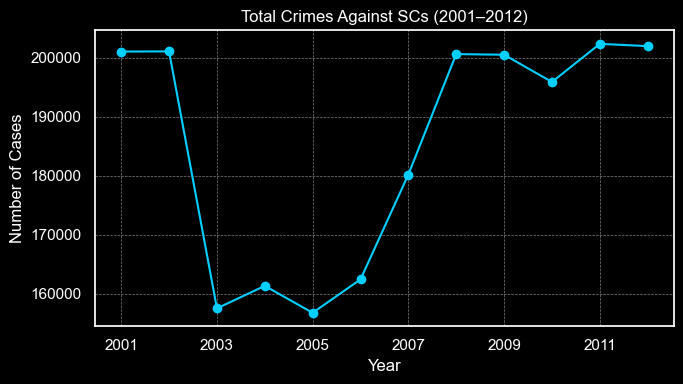

In [371]:
import matplotlib.pyplot as plt

# Set the dark background
plt.style.use('dark_background')

# Plot
plt.figure(figsize=(7, 4))
yearly_total.plot(kind='line', marker='o', color='#00cfff')

plt.title('Total Crimes Against SCs (2001–2012)', color='white')
plt.ylabel("Number of Cases", color='white')
plt.xlabel("Year", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Optional light grid
plt.tight_layout()
plt.show()


##### Top 10 States by Total Crimes Against SCs (2001–2012)

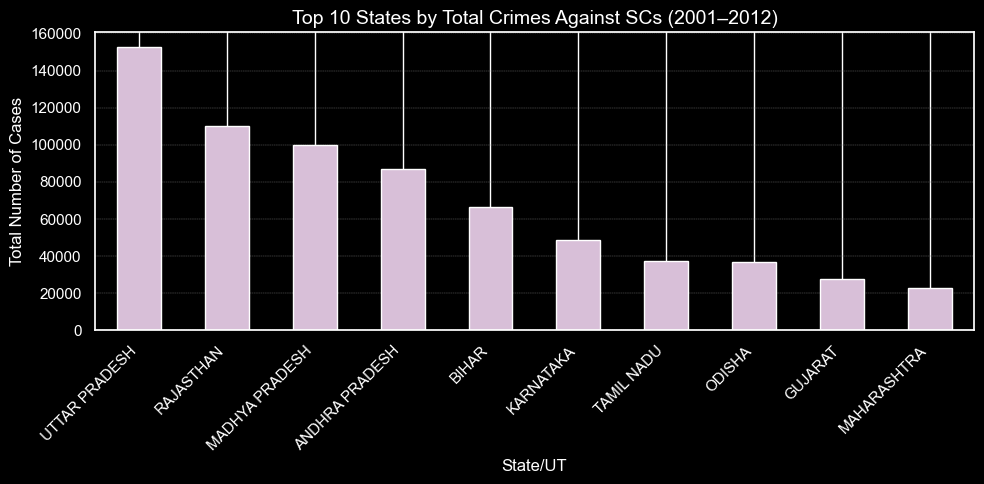

In [325]:
# Total Crimes by State (All Years & Crime Types Combined)

df_SC['Total_By_State'] = df_SC.loc[:, '2001':'2012'].sum(axis=1)
state_totals = df_SC.groupby('STATE/UT')['Total_By_State'].sum().sort_values(ascending=False)

# Filter out unwanted rows
filtered_state_totals = state_totals.drop(labels=["TOTAL (ALL-INDIA)", "TOTAL (STATES)"], errors='ignore')
top_states = filtered_state_totals.head(10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('black')     # Figure background
ax.set_facecolor('black')            # Axes background

# Plot
top_states.plot(kind='bar', edgecolor='white', color='thistle', ax=ax)

# Titles and labels
ax.set_title("Top 10 States by Total Crimes Against SCs (2001–2012)", fontsize=14, color='white')
ax.set_ylabel("Total Number of Cases", color='white')
ax.set_xlabel("State/UT", color='white')

# Ticks and grid
ax.tick_params(colors='white')
ax.set_xticklabels(top_states.index, rotation=45, ha='right')
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.3)

plt.tight_layout()
plt.show()


##### Top Crimes Against SCs in Uttar Pradesh

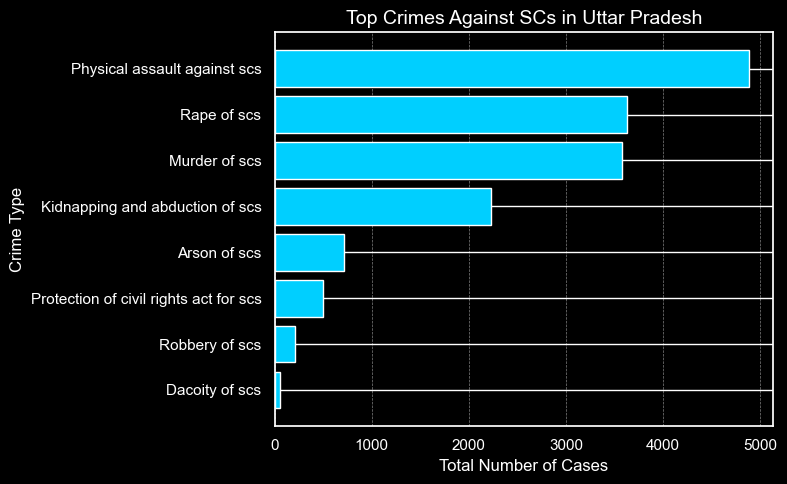

In [357]:
# top crimes in Uttar Prades Against SCs

up_data = df_SC[df_SC['STATE/UT'].str.upper() == 'UTTAR PRADESH'].copy()
up_data.loc[:, 'Total_By_Crime'] = up_data.loc[:, '2001':'2012'].sum(axis=1)

# Strip leading/trailing whitespace
up_data.loc[:, 'Crime_Head'] = up_data['Crime_Head'].str.strip()
up_data.loc[:, 'Crime_Head'] = up_data['Crime_Head'].replace({'HURT OF SCs': 'Physical Assault Against SCs'})
up_data['Crime_Head'] = up_data['Crime_Head'].str.strip().str.capitalize()
top_crimes_up = up_data.sort_values(by='Total_By_Crime', ascending=False)


# Skip first two crimes
top_crimes_up_filtered = top_crimes_up.iloc[3:]

# Set dark background
plt.style.use('dark_background')

# Sort data for better visual ordering
data = top_crimes_up_filtered.sort_values('Total_By_Crime')

# Plot
plt.figure(figsize=(8, 5))
plt.barh(data['Crime_Head'], data['Total_By_Crime'], color='#00cfff', edgecolor='white')

# Titles and labels
plt.title("Top Crimes Against SCs in Uttar Pradesh", fontsize=14, color='white')
plt.xlabel("Total Number of Cases", color='white')
plt.ylabel("Crime Type", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='x', linestyle='--', linewidth=0.5, color='gray')

plt.tight_layout()
plt.show()

